# Importerer nødvendige biblioteker

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression





# Indlæsning af data

In [132]:
df = pd.read_csv('../data/Clean_Dataset.csv', index_col=0)
df.sample(5)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
33112,Air_India,AI-467,Delhi,Evening,one,Night,Hyderabad,Economy,27.08,34,5232
247176,Vistara,UK-852,Bangalore,Morning,one,Evening,Delhi,Business,8.58,31,54841
280689,Vistara,UK-878,Hyderabad,Afternoon,one,Early_Morning,Bangalore,Business,18.92,10,38099
277374,Vistara,UK-880,Hyderabad,Afternoon,one,Early_Morning,Mumbai,Business,18.50,4,58315
41041,Vistara,UK-819,Delhi,Afternoon,two_or_more,Night,Chennai,Economy,8.83,37,8719


In [133]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

Vi har importeret dataene og lavet en hurtig gennemgang for at få et overblik over datasættet. Nu går vi videre med at forberede og rense dataene, så de er klar til analyse.

# Rensning af data

In [136]:
# Tjekker for manglende værdier
print("Tjekker for manglende værdier:")
print(df.isnull().sum())

# Tjekker for NaN-værdier
print("Tjekker for NaN-værdier:")
print(df.isna().sum())

# Tjekker for datatyper
print("Tjekker for datatyper:")
print(df.info())

# Tjekker for duplikater
print("Tjekker for duplikater:")
print(df.duplicated().sum()) 

Tjekker for manglende værdier:
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64
Tjekker for NaN-værdier:
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64
Tjekker for datatyper:
<class 'pandas.core.frame.DataFrame'>
Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops       

In [137]:
df.shape

(300153, 11)

In [138]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

Som man kan se, indeholder datasættet ikke nogen manglende værdier, hverken som NaN eller null. Derudover består datatyperne primært af tekstdata (object), som nu skal konverteres til string, samt nogle numeriske kolonner i form af heltal (int64) og decimaltal (float64).

Der er heller ingen duplikater i datasættet, hvilket betyder, at der ikke er behov for rensning af dataen.

Nu opdeles datasættet i to separate dataframes: en med numeriske værdier og en med nominelle (kategoriske) data, så det bliver lettere at arbejde målrettet med hver type.

In [140]:
# Fjerner 'flight' kolonnen, da den kun er en identifikator og ikke bidrager til analysen
df.drop(['flight'], axis=1, inplace=True)  

# Fjerner 'departure_time' kolonnen, da den ikke er relevant for vores forskningsspørgsmål om dage før afrejse og antal stop
df.drop(['departure_time'], axis=1, inplace=True)  

# Fjerner 'arrival_time' kolonnen, da den ikke er relevant for vores forskningsspørgsmål om dage før afrejse og antal stop
df.drop(['arrival_time'], axis=1, inplace=True)  

In [141]:
# Udfører one-hot encoding på de kategoriske kolonner for at gøre dem numeriske og lettere at regressere på
dfNumeric = pd.get_dummies(df, columns=['airline', 'source_city', 'stops', 'destination_city', 'class'], dtype=pd.Int64Dtype())

# Viser 5 tilfældige rækker af det transformerede datasæt
dfNumeric.sample(5)

,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Bangalore,...,stops_two_or_more,stops_zero,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Business,class_Economy
159357,8.58,8,15373,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
214130,9.75,28,49177,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
140917,24.83,39,4705,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
140624,10.50,37,6195,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
90077,7.00,31,4028,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


In [142]:
# Konverterer alle 'object'-kolonner til 'string'-type
for col in df:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('string')

# Tjekker datatyperne efter konvertering
df.dtypes

airline             string[python]
source_city         string[python]
stops               string[python]
destination_city    string[python]
class               string[python]
duration                   float64
days_left                    int64
price                        int64
dtype: object

# Dataudforskning

In [144]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


Duration: Varierer fra 0,83 til 49,83 timer, med et gennemsnit på 12,22 timer.

Days_Left: Varierer fra 1 til 49 dage, med et gennemsnit på 26 dage.

Price: Priserne spænder fra 1.105 til 123.071, med en gennemsnitlig pris på 20.890.

Der er stor variation i priserne, hvilket sandsynligvis skyldes forskelle i sæson, rejseklasse og flyselskab.

In [146]:
df.columns

Index(['airline', 'source_city', 'stops', 'destination_city', 'class',
       'duration', 'days_left', 'price'],
      dtype='object')

Vi kan se, at dataene allerede er forholdsvis standardiserede, men lad os konvertere kolonnenavnene til at bruge "x-y" i stedet for "x_y" for at demonstrere muligheden for at forberede data.

In [148]:
import gc

dfStan = df.copy()

# Skifter kolonnenavne til store bogstaver og erstatter "_" med "-"
dfStan.columns = [col.upper().replace('_', '-') for col in dfStan.columns]

print(dfStan.columns)

del dfStan

# Kører garbage collection for at rydde op i hukommelsen
gc.collect()

Index(['AIRLINE', 'SOURCE-CITY', 'STOPS', 'DESTINATION-CITY', 'CLASS',
       'DURATION', 'DAYS-LEFT', 'PRICE'],
      dtype='object')


15464

Som nævnt foretager vi ikke en permanent ændring af kolonnenavnene i datasættet, men viser blot, hvordan det kan gøres.

For at lave en grundlæggende visualisering og udforske fordelingen af prisdataene, laver vi et histogram.

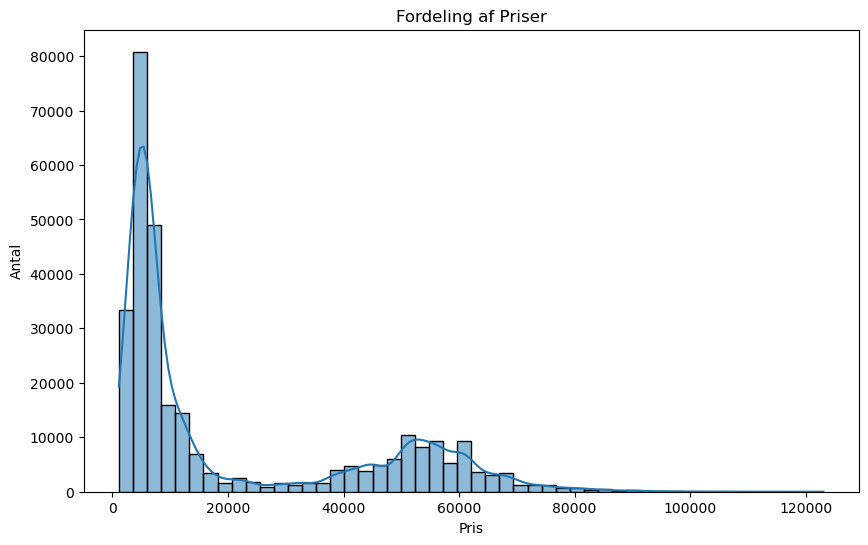

Skævhed (Skewness): 1.0613719490179376
Kurtosis: -0.3963061069535949
Fordelingen er højreskæv (positiv skævhed).
Fordelingen er fladere end en normalfordeling (lav kurtosis).


In [151]:
from scipy.stats import skew, kurtosis  

# Plotter histogram med KDE for prisfordeling
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=50)
plt.title('Fordeling af Priser')
plt.ylabel('Antal')
plt.xlabel('Pris')
plt.show()

# Beregning af skævhed og kurtosis
skewness = skew(df['price'].dropna())  # Fjerner NaN-værdier før beregning
kurt = kurtosis(df['price'].dropna())  # Fjerner NaN-værdier før beregning

# Udskriver resultaterne
print(f"Skævhed (Skewness): {skewness}")
print(f"Kurtosis: {kurt}")

# Tolkning af skævhed og kurtosis:
if skewness > 0:
    print("Fordelingen er højreskæv (positiv skævhed).")
elif skewness < 0:
    print("Fordelingen er venstreskæv (negativ skævhed).")
else:
    print("Fordelingen er symmetrisk.")

if kurt > 3:
    print("Fordelingen er spidsere end en normalfordeling (høj kurtosis).")
elif kurt < 3:
    print("Fordelingen er fladere end en normalfordeling (lav kurtosis).")
else:
    print("Fordelingen har samme spidshed som en normalfordeling.")


Fordelingen har en højre hale og færre ekstreme værdier end en normalfordeling, hvilket kan indikere, at dataene er mere spredte og ikke indeholder så mange outliers. Skævheden tyder på, at vi har flere lavere værdier med nogle højere outliers, som vi vil fjerne ved hjælp af z-score teknikken for at forbedre modellens præcision.

# 2. Hvordan påvirker antallet af stop prisen?

# Overblik over fordelingen af stops:

In [155]:
df['stops'].describe()


count     300153
unique         3
top          one
freq      250863
Name: stops, dtype: object

In [156]:
df['stops'].value_counts()


stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: Int64

# Konverter fra string til tal:

In [158]:
df['stops_numb'] = df['stops'].map({
    'zero': 0,
    'one': 1,
    'two_or_more': 2,
})


In [159]:
df['stops_numb'].value_counts()

stops_numb
1    250863
0     36004
2     13286
Name: count, dtype: int64

# Beskrivende statistik og visualisering: 

 # Beskrivende statistik for pris og stop:

In [162]:
print(df[['stops_numb', 'price']].describe())



          stops_numb          price
count  300153.000000  300153.000000
mean        0.924312   20889.660523
std         0.398106   22697.767366
min         0.000000    1105.000000
25%         1.000000    4783.000000
50%         1.000000    7425.000000
75%         1.000000   42521.000000
max         2.000000  123071.000000


# Korrelationsanalyse:

            stops_numb     price
stops_numb    1.000000  0.119648
price         0.119648  1.000000


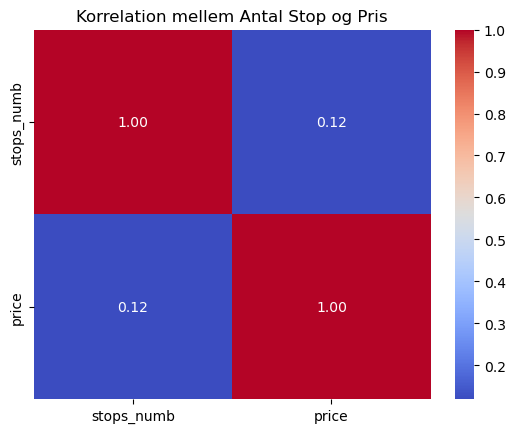

In [164]:
corr=(df[['stops_numb', 'price']].corr())
print (corr)

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korrelation mellem Antal Stop og Pris')
plt.show()


###
Der er en meget lav positiv korrelation på 0.119648 mellem stops og pris. Det betyder, at der er en svag positiv sammenhæng mellem antallet af stop og prisen. Det betyder, at antallet af stop kun i begrænset omfang forklarer variationen i prisen.

# Visualisere forholdet mellem stops og pris (Scatter plot):

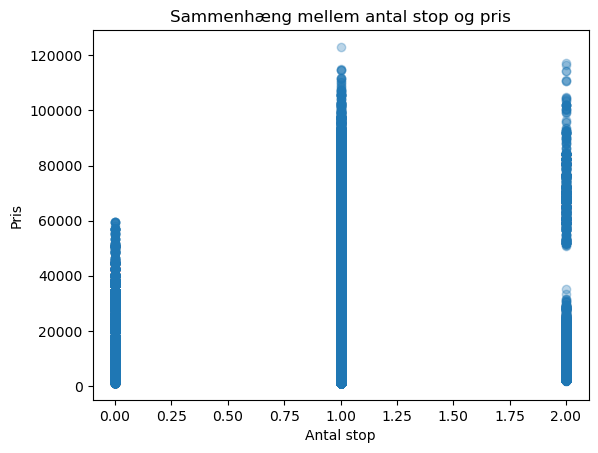

In [167]:
plt.scatter(df['stops_numb'], df['price'], alpha=0.3)
plt.title('Sammenhæng mellem antal stop og pris')
plt.xlabel('Antal stop')
plt.ylabel('Pris')
plt.show()



### Analyse af scatterplottet: 

| Antal stop | Observationer om prisfordeling                                   |
|------------|-----------------------------------------------------------------|
| 0 stop     | Mange data ligger under 60.000 – generelt lavere priser         |
| 1 stop     | Større spredning i priserne, inkl. meget høje priser over 120.000 |
| 2 stop     | Stor spredning med tendens til højere priser end direkte fly, men nogle under 40.000 |

Scatterplottet viser, at direkte fly (0 stop) typisk har lavere og mere koncentrerede priser, mens rejser med 1 eller 2 stop har større prisvariation og flere dyre billetter.




# Visualiser prisfordelingen per antal stop (Boxplot): 

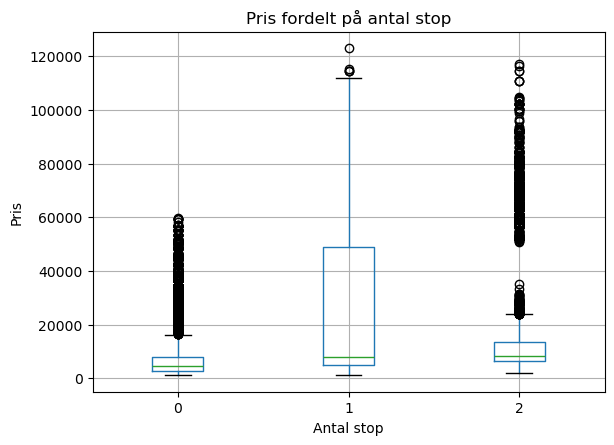

In [170]:

import matplotlib.pyplot as plt

df_sorted = df.sort_values('stops_numb')
df_sorted.boxplot(column='price', by='stops_numb')
plt.title('Pris fordelt på antal stop')
plt.xlabel('Antal stop')
plt.ylabel('Pris')
plt.suptitle("")
plt.show()


### Analyse af Boxplot: 

| Antal stop | Medianpris   | Spredning | Outliers | Kommentar                                                 |
|------------|--------------|-----------|----------|------------------------------------------------------------|
| 0          | Lavest medianpris          | Lav       | Mange      |Direkte fly er generelt billigere og mere stabile i pris, men enkelte meget dyre billetter trækker ud som outliers.                             |
| 1          | Højest medianpris       | Stor      | Få    | 1-stop flyvninger har generelt høje priser og stor variation, med få ekstreme afvigelser.                 |
| 2          | Højere end 0 stop, men en smule lavere end 1 (ret tæt) | Højere end 0 stop, men langt lavere end 1 | Mange    | 2-stop flyvninger har tendens til høje og ustabile priser, med mange ekstreme prisudsving. |

Boxplottet viser, at direkte fly (0 stop) generelt har de laveste og mest stabile priser, selvom der findes enkelte meget dyre billetter som outliers. Flyvninger med 1 stop har den højeste medianpris og stor prisvariation, men færre ekstreme prisudsving. Fly med 2 stop ligger prismæssigt tæt på 1-stop, men med flere outliers og dermed større usikkerhed i prissætningen.

Gennemsnitspris pr. antal stop:
 stops_numb
0     9375.938535
1    22900.992482
2    14113.450775
Name: price, dtype: float64


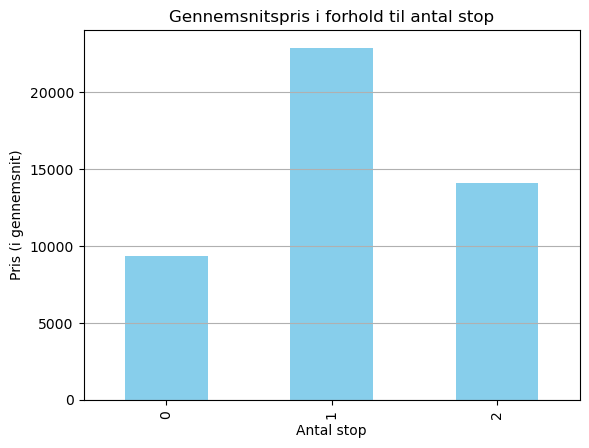

In [172]:
average_prices = df.groupby('stops_numb')['price'].mean()
print("Gennemsnitspris pr. antal stop:\n", average_prices)

# Visualisering af gennemsnitspriser
average_prices.plot(kind='bar', color='skyblue')
plt.title('Gennemsnitspris i forhold til antal stop')
plt.xlabel('Antal stop')
plt.ylabel('Pris (i gennemsnit)')
plt.grid(axis='y')
plt.show()

### Analyse af gennemsnitspris i forhold til antal stop

| Antal stop | Gennemsnitspris (ca.) | 
|------------|------------------------|
| 0 stop     | 9.400                  | 
| 1 stop     | 23.000                 | 
| 2 stop     | 14.000                 | 


Den gennemsnitlige pris er lavest for direkte fly, højest for 1 stop, og ligger i midten for 2 stop. 


# Konklusion på beskrivende statistik – Hvordan påvirker antallet af stop prisen?

Analysen af flypriser i forhold til antallet af stop viser at hypotesen om, at flyvninger med flere stop generelt er billigere end direkte fly ikke er sand.

• Korrelationsanalysen viser en svag positiv sammenhæng (ca. 0,12) mellem antal stop og pris, hvilket indikerer, at prisen stiger en smule med flere stop, men sammenhængen er ikke stærk og ikke nødvendigvis lineær.

• Scatterplottet illustrerer, at direkte fly (0 stop) typisk har lavere og mere stabile priser, med de fleste billetpriser under 60.000, mens 1-stop og 2-stop flyvninger udviser større spredning og flere meget dyre billetter (op til og over 120.000). 2-stop flyvninger viser desuden en tendens til lidt højere priser end direkte fly, men også flere lave priser under 40.000.

• Boxplottet bekræfter, at direkte fly har den laveste medianpris og mest stabile prisfordeling, men også mange outliers, der repræsenterer enkelte meget dyre billetter. 1-stop flyvninger har den højeste medianpris og stor prisvariation, men relativt få ekstreme prisudsving. 2-stop flyvninger ligger prismæssigt tæt på 1-stop, men med flere outliers, hvilket antyder større usikkerhed og variation i priserne.

• Gennemsnitspriserne understøtter de forrige diagrammer, hvor direkte fly er billigst (ca. 9.400), 2-stop fly ligger i midten (ca. 14.000), og 1-stop fly med de dyreste priser (ca. 23.000).

Sammenfattende tyder alle analyser på, at flyvninger med flere stop ikke nødvendigvis er billigere end direkte flyvninger. Derimod viser det sig at 1-stop flyvninger ofte er de dyreste. Prisvariationerne er størst for flyvninger med stop, hvilket betyder, at prisfastsættelsen er mere usikker og afhængig af flere faktorer.


# Sprint 3: 

# Datamodellering

## Defination af features og target: 

In [179]:
X = dfNumeric.drop('price', axis=1)  
y = dfNumeric['price']             

## Split data i trænings- og testdatasæt:

In [181]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Træn modellen med Random Forest Regressor:

In [183]:
RFRmodel = RandomForestRegressor(n_estimators=100, random_state=42)
RFRmodel.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

## Evaluering af modellen:

In [185]:
y_pred = RFRmodel.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R² Score: {r2:.2f}')



Mean Squared Error (MSE): 10922214.49
Root Mean Squared Error (RMSE): 3304.88
Mean Absolute Error (MAE): 1363.39
R² Score: 0.98


# -MSE: 
Gennemsnittet af de kvadrerede fejl er relativt højt (10.922.214,49).
Dette skyldes, at store fejl straffes ekstra meget i denne beregning, da afvigelser kvadreres. MSE er derfor høj, selvom de fleste fejl kan være små.
# -RMSE:
Kvadratroden af MSE giver en værdi på 3.304,88, hvilket betyder, at modellen i gennemsnit laver en fejl på ca. 3.305 pr. forudsigelse.
Dette er et lavt fejlniveau, særligt i forhold til prisniveauet, som spænder op til over 120.000.

# -MAE:
Den gennemsnitlige absolutte fejl er 1.363,39. Den lave værdi her viser, at de fleste forudsigelser rammer tæt på de faktiske værdier.

# -R²-score:

R²-værdien er 0,98, hvilket betyder, at modellen forklarer 98 % af variationen i de faktiske priser.
Modellen er dermed god til at forudsige, og har stor præcision. Kun 2 % af variationen forbliver uforklaret.



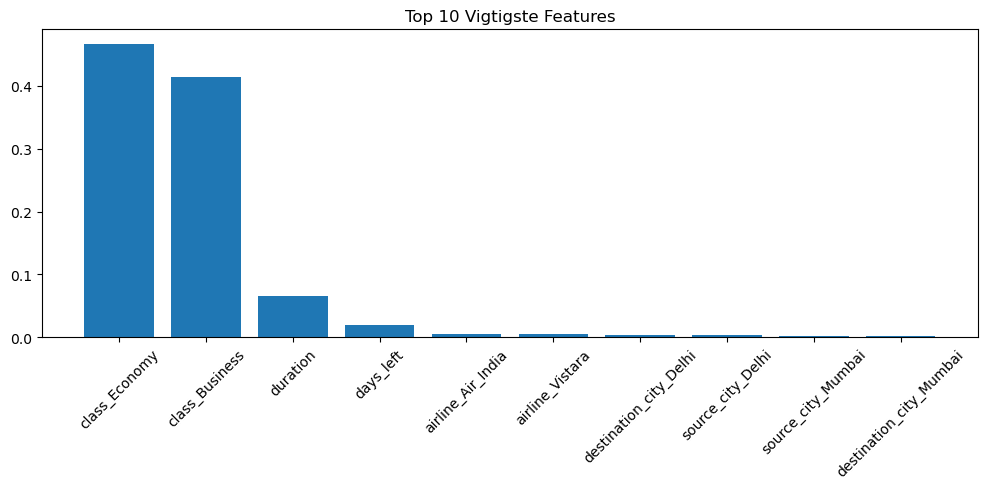

In [187]:

importances = RFRmodel.feature_importances_
feature_names = X.columns

# Sorter og vis top 10
indices = np.argsort(importances)[::-1][:10]
plt.figure(figsize=(10, 5))
plt.title("Top 10 Vigtigste Features")
plt.bar(range(len(indices)), importances[indices], align="center")
plt.xticks(range(len(indices)), [feature_names[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()


# Konklusion: 

I følge modellen er de vigtigste features klassen, derefter kommer duration, days left og forskellige andre features. Antallet af stops er slet ikke blandt top 10, så det viser sig at stop ikke er den feature der har størst betydning for prisen. 

# Multiple lineær regression:

In [190]:

# liste med variabler (features), som bruges til input ( stops_zero bliver reference)
feature_cols = ['class_Business','stops_two_or_more', 'stops_one', ]

# udtræk kolonner fra dataframen
X = dfNumeric[feature_cols]

# print første 5 rækker
X.head()

,class_Business,stops_two_or_more,stops_one
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [191]:
# target variabel y
y = dfNumeric['price']

# print første 5 rækker
y.head()

0    5953
1    5953
2    5956
3    5955
4    5955
Name: price, dtype: int64

In [192]:
# split data i trænings- og testdata

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Opret model
linregM = LinearRegression()

# træn modellen
linregM.fit(X_train, y_train)


LinearRegression()

In [193]:
# udskriv skæringspunktet (intercept)
print('b0 =', linregM.intercept_)

# udskriv hældningerne (koefficienter)
print('bi =', linregM.coef_)

b0 = -927.8329548136608
bi = [45688.28570721 11277.02747723  8466.57003154]


In [194]:
# kombiner feature-navne med deres koefficienter
list(zip(feature_cols, linregM.coef_))

[('class_Business', 45688.28570721017),
 ('stops_two_or_more', 11277.027477233896),
 ('stops_one', 8466.57003154224)]

In [195]:
# forudsige priser på testdatasættet
y_predicted = linregM.predict(X_test)

In [196]:
y_predicted

array([ 7538.73707673,  7538.73707673,  7538.73707673, ...,
       53227.02278394,  7538.73707673, 53227.02278394])

In [197]:
# Mean Absolute Error (MAE)
print(f"Mean Absolute Error (MAE): {metrics.mean_absolute_error(y_test, y_predicted):.2f}")

# Mean Squared Error (MSE) 
mse = metrics.mean_squared_error(y_test, y_predicted)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Root Mean Squared Error (RMSE) ud fra MSE 
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# R² score
r2 = r2_score(y_test, y_predicted)
print(f"R² score: {r2:.2f}")


Mean Absolute Error (MAE): 5038.04
Mean Squared Error (MSE): 53390435.82
Root Mean Squared Error (RMSE): 7306.88
R² score: 0.90


# Analyse af Multiple Linear Regression model: 


MAE (5038): Gennemsnitlig absolut fejl på ca. 5038, dvs. forudsigelserne afviger i gennemsnit med dette beløb.

MSE (53.390.435): Meget høj, hvilket indikerer at nogle fejl er store, da MSE kvadrerer afvigelserne og straffer store fejl hårdt.

RMSE (7307): Højere end MAE, hvilket bekræfter, at enkelte store fejl trækker gennemsnitsfejlen op. 

R² (0.90): Meget god — modellen forklarer 90 % af variationen, hvilket tyder på en præcis og pålidelig model.

# Konklusion:
Modellen er god til at forklare variationen i priser (R²=0,90), men fejlniveauet tyder på, at forudsigelserne kan være mindre præcise ved lave priser, hvor en fejl på flere tusinde kan være stor relativt set, og det viser Intercept (b0 = –927.83) også, da den er en negativ pris. 

# Analyse af koefficienter med stops_zero som reference:

### -class_Business (+45688): 
Business-billetter er i gennemsnit ca. 45.700 kr. dyrere end Economy (reference).

### -stops_two_or_more (+11277): 
Fly med to eller flere stop koster i gennemsnit 11.277 kr. mere end fly uden stop (stops_zero).

### -stops_one (+8467):
Fly med ét stop koster i gennemsnit 8.467 kr. mere end fly uden stop (stops_zero).

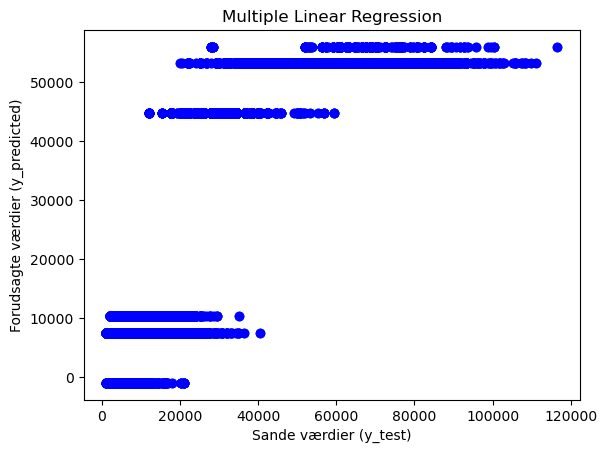

In [201]:
# Visualisering

plt.title('Multiple Linear Regression')
plt.scatter(y_test, y_predicted, color='blue', label='Data points')

plt.xlabel('Sande værdier (y_test)')
plt.ylabel('Forudsagte værdier (y_predicted)')

plt.scatter(y_test, y_predicted, color='blue')
plt.show()

# Forbedring af Multiple Linear Regression model med log-transform: 

In [203]:
# Fjern rækker med 0 eller negative priser først
dfNumeric = dfNumeric[dfNumeric['price'] > 0]

# Log-transformér prisen
dfNumeric['log_price'] = np.log(dfNumeric['price'])

# liste med variabler (features), som bruges til input ( stops_zero bliver reference)
feature_cols = ['class_Business','stops_two_or_more', 'stops_one', ]

# udtræk kolonner fra dataframen
X = dfNumeric[feature_cols]

# print første 5 rækker
X.head()

# target variabel y
y = dfNumeric['log_price']

# print første 5 rækker
y.head()

# split data i trænings- og testdata

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Opret model
linregM1 = LinearRegression()

# træn modellen
linregM1.fit(X_train, y_train)

# udskriv skæringspunktet (intercept)
print('b0 =', linregM1.intercept_)

# udskriv hældningerne (koefficienter)
print('bi =', linregM1.coef_)

# kombiner feature-navne med deres koefficienter
list(zip(feature_cols, linregM1.coef_))

# forudsige priser på testdatasættet
y_predicted = linregM1.predict(X_test)

y_predicted

# Mean Absolute Error (MAE)
print(f"Mean Absolute Error (MAE): {metrics.mean_absolute_error(y_test, y_predicted):.2f}")

# Mean Squared Error (MSE) 
mse = metrics.mean_squared_error(y_test, y_predicted)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Root Mean Squared Error (RMSE) ud fra MSE 
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# R² score
r2 = r2_score(y_test, y_predicted)
print(f"R² score: {r2:.2f}")




b0 = 8.146168178288267
bi = [2.16963755 0.83223196 0.56362773]
Mean Absolute Error (MAE): 0.31
Mean Squared Error (MSE): 0.18
Root Mean Squared Error (RMSE): 0.42
R² score: 0.86


# Konklusion:

Efter log-transformeringen er intercept blevet positiv (8,15). MAE, MSE og RMSE er alle blevet betydelig mindre. R2 er blevet lidt mindre, men er stadig høj. Så ved at benytte log-transformering er modellen blevet mere robust overfor outliers. 



# Economy-klasse:

| **Antal stop** | **Beregning (log-pris)** | **Log-pris** | **Pris (kr)**        |
| -------------- | ------------------------ | ------------ | -------------------- |
| 0 stop         | `8.146`                  | 8.146        | `e^8.146 ≈ 3.445 kr` |
| 1 stop         | `8.146 + 0.564 = 8.709`  | 8.709        | `e^8.709 ≈ 6.078 kr` |
| 2+ stop        | `8.146 + 0.832 = 8.978`  | 8.978        | `e^8.978 ≈ 7.915 kr` |


# Business-klasse:

| **Antal stop** | **Beregning (log-pris)**         | **Log-pris** | **Pris (kr)**          |
| -------------- | -------------------------------- | ------------ | ---------------------- |
| 0 stop         | `8.146 + 2.170 = 10.316`         | 10.316       | `e^10.316 ≈ 30.188 kr` |
| 1 stop         | `8.146 + 2.170 + 0.564 = 10.879` | 10.879       | `e^10.879 ≈ 52.777 kr` |
| 2+ stop        | `8.146 + 2.170 + 0.832 = 11.148` | 11.148       | `e^11.148 ≈ 69.247 kr` |


# Konklusion: 

Prisen på flybilletter påvirkes markant af både klasse og antal stop.Business-billetter er væsentligt dyrere end Economy, og flere stop øger gennemsnitsprisen i begge klasser.

Ved brug af log-transformeret pris blev fejlene reduceret og forskellene mellem grupperne lettere at tolke.

# Endelig konklusion: Hvordan påvirker antallet af stop prisen?

Hypotesen om, at flyvninger med flere stop generelt er billigere end direkte flyvninger, forkastes.

Den beskrivende statistik viser, at gennemsnitsprisen er lavest for direkte fly (ca. 9.400 kr.), højest for 1-stop fly (ca. 23.000 kr.) og midt imellem for 2-stop (ca. 14.000 kr.). Visualiseringer som scatter- og boxplots bekræfter, at 1-stop og 2-stops flyvninger ofte har højere og mere ustabile priser end direkte fly.

Den multiple lineær regressionsmodel viser, at både 1 og 2 stop er forbundet med højere priser sammenlignet med direkte fly. Én stop øger prisen med ca. 8.467 kr., og to eller flere stop med ca. 11.277 kr. Det betyder, at flere stop faktisk ofte øger prisen frem for at reducere den.

Endelig viser Random Forest-modellen, at antallet af stop slet ikke er blandt de 10 vigtigste faktorer for prisfastsættelsen. Klassen, rejsens varighed og antal dage til afrejse har langt større betydning.